In [249]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 1000
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline

In [250]:
surrounding_pdf = pd.read_csv('../UseCase_3_Datasets/store_surrounding_pdf_exp.csv')
surrounding_nf_pdf = pd.read_csv('../UseCase_3_Datasets/new_features.csv')

surrounding_pdf = pd.merge(surrounding_nf_pdf,surrounding_pdf,on='store_code',how='inner')
surrounding_pdf = surrounding_pdf.drop_duplicates()

y_column = 'total_sales'
# store_sales = pd.read_csv('../UseCase_3_Datasets/sales_daily_simple_sum.csv')
# sales_pdf_daily_sub = store_sales[['store_code','total_sales']]

#store_sales = pd.read_csv('../UseCase_3_Datasets/sales_per_hr.csv')
#sales_pdf_daily_sub = store_sales[['store_code','sales_per_hr']]

store_sales = pd.read_csv('../UseCase_3_Datasets/sales_per_day_period.csv')
sales_pdf_daily_sub = store_sales[['store_code','total_sales','Morning','Afternoon','Evening','sales_pattern']]
sales_pdf_daily_sub = sales_pdf_daily_sub[(sales_pdf_daily_sub['sales_pattern'] == 'Evening') |
                                          (sales_pdf_daily_sub['sales_pattern'] == 'Afternoon')]
sales_pdf_daily_sub = sales_pdf_daily_sub[['store_code',y_column]]


In [251]:
print("Surrounding Shape",surrounding_pdf.shape)
print("Sales Shape",sales_pdf_daily_sub.shape)

Surrounding Shape (525, 705)
Sales Shape (414, 2)


In [335]:
#Join Store and Surroounding datasets
sales_surrounding_pdf = pd.merge(sales_pdf_daily_sub,surrounding_pdf,on='store_code',how='inner')
sales_surrounding_pdf = sales_surrounding_pdf.drop_duplicates()
# Dropping columns that do not provide useful information for this analysis
for i in sales_surrounding_pdf.columns:
    if sales_surrounding_pdf[i].nunique() == 1:
        sales_surrounding_pdf.drop(i, axis = 1, inplace = True)
print("Sales Surrounding Shape",sales_surrounding_pdf.shape)

Sales Surrounding Shape (232, 681)


In [336]:
# Dropping columns that do not provide useful information for this analysis
for i in sales_surrounding_pdf.columns:
    if sales_surrounding_pdf[i].nunique() == 1:
        sales_surrounding_pdf.drop(i, axis = 1, inplace = True)

In [337]:
# #Visualization of individual attributes
# #Histogram
# sales_surrounding_pdf.hist(sharex=False,sharey=False,xlabelsize=0.25,ylabelsize=0.25,figsize=(20,20))
# pyplot.show()

In [338]:
# sales_surrounding_pdf.plot(kind='density', subplots=True, layout=(10,18), sharex=False, legend=False,fontsize=1,
#                           figsize=(20,20))
# pyplot.show()

In [339]:
# fig = pyplot.figure(figsize=(15,15))
# ax = fig.add_subplot(111)
# cax = ax.matshow(sales_surrounding_pdf.corr(),vmin=-1, vmax=1)
# fig.colorbar(cax)
# pyplot.show()

In [340]:
import math

In [341]:
#One hot Encoding for city values
sales_surrounding_pdf_ohe = pd.get_dummies(sales_surrounding_pdf)
#Create Train,Test without imputation
#X = sales_surrounding_pdf.loc[:, sales_surrounding_pdf.columns != 'total_sales']
#X = sales_surrounding_pdf.loc[:, sales_surrounding_pdf.columns != 'store_code']

y = sales_surrounding_pdf_ohe[y_column].apply(lambda x : math.log(x+1))
X = sales_surrounding_pdf_ohe.drop([y_column,'store_code'],axis=1)
#X = sales_surrounding_pdf.drop('store_code',axis=1)

sales_surrounding_pdf_ohe.head(5)

,store_code,total_sales,total_user_rating_accounting,total_user_rating_airport,total_user_rating_amusement_park,total_user_rating_art_gallery,total_user_rating_atm,total_user_rating_bakery,total_user_rating_bank,total_user_rating_bar,total_user_rating_beauty_salon,total_user_rating_bicycle_store,total_user_rating_book_store,total_user_rating_bowling_alley,total_user_rating_bus_station,total_user_rating_cafe,total_user_rating_campground,total_user_rating_car_dealer,total_user_rating_car_rental,total_user_rating_car_repair,total_user_rating_car_wash,total_user_rating_casino,total_user_rating_cemetery,total_user_rating_church,total_user_rating_city_hall,total_user_rating_clothing_store,total_user_rating_convenience_store,total_user_rating_courthouse,total_user_rating_dentist,total_user_rating_department_store,total_user_rating_doctor,total_user_rating_electrician,total_user_rating_electronics_store,total_user_rating_embassy,total_user_rating_fire_station,total_user_rating_florist,total_user_rating_funeral_home,total_user_rating_furniture_store,total_user_rating_gas_station,total_user_rating_gym,total_user_rating_hair_care,total_user_rating_hardware_store,total_user_rating_home_goods_store,total_user_rating_hospital,total_user_rating_insurance_agency,total_user_rating_jewelry_store,total_user_rating_laundry,total_user_rating_lawyer,total_user_rating_library,total_user_rating_liquor_store,total_user_rating_local_government_office,total_user_rating_locksmith,total_user_rating_lodging,total_user_rating_meal_delivery,total_user_rating_meal_takeaway,total_user_rating_mosque,total_user_rating_movie_theater,total_user_rating_moving_company,total_user_rating_museum,total_user_rating_night_club,total_user_rating_painter,total_user_rating_park,total_user_rating_parking,total_user_rating_pet_store,total_user_rating_pharmacy,total_user_rating_physiotherapist,total_user_rating_plumber,total_user_rating_police,total_user_rating_post_office,total_user_rating_real_estate_agency,total_user_rating_restaurant,total_user_rating_roofing_contractor,total_user_rating_shoe_store,total_user_rating_shopping_mall,total_user_rating_spa,total_user_rating_stadium,total_user_rating_storage,total_user_rating_store,total_user_rating_subway_station,total_user_rating_synagogue,total_user_rating_taxi_stand,total_user_rating_train_station,total_user_rating_transit_station,total_user_rating_travel_agency,total_user_rating_university,total_user_rating_veterinary_care,rating_accounting,rating_airport,rating_amusement_park,rating_art_gallery,rating_atm,rating_bakery,rating_bank,rating_bar,rating_beauty_salon,rating_bicycle_store,rating_book_store,rating_bowling_alley,rating_bus_station,rating_cafe,...,avr_movie_theater,avr_taxi_stand,avr_jewelry_store,avr_church,avr_convenience_store,avr_campground,avr_lawyer,avr_parking,avr_post_office,avr_hardware_store,avr_meal_takeaway,avr_gas_station,avr_funeral_home,avr_restaurant,avr_home_goods_store,avr_casino,avr_veterinary_care,avr_airport,avr_bus_station,avr_museum,avr_night_club,avr_electrician,avr_mosque,avr_amusement_park,avr_lodging,avr_florist,avr_liquor_store,avr_hospital,avr_car_rental,avr_stadium,avr_store,avr_hair_care,avr_transit_station,avr_meal_delivery,avr_gym,avr_park,avr_dentist,avr_library,avr_book_store,avr_painter,avr_roofing_contractor,avr_moving_company,avr_clothing_store,avr_furniture_store,avr_physiotherapist,avr_atm,avr_art_gallery,avr_car_wash,avr_locksmith,avr_spa,avr_accounting,avr_cafe,avr_car_repair,avr_synagogue,avr_real_estate_agency,avr_electronics_store,avr_doctor,avr_bicycle_store,avr_storage,avr_train_station,avr_fire_station,avr_laundry,avr_insurance_agency,avr_plumber,avr_pet_store,avr_bakery,avr_travel_agency,near_by_post_code,no_of_near_by_shops,n_review,city_AG,city_AI,city_AR,city_BE,city_BL,city_BS,city_CH,city_CHCTLO,city_FR,city_GE,city_GR,city_JU,city_LU,city_NE,city_NW,city_SG,city_SH,city_SO,city_SZ,city_Schweiz,city_Switzerland,city_TG,city_TI,city_UR,city_Unknown,city_VD,city_VS,

In [342]:
#Divide into train and test
validation_size = 0.30
seed = 33
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=validation_size,random_state=seed)

In [343]:
#Standardize Target for Regression.
train_mean = np.mean(y_train)
train_std = np.std(y_train)
print (train_mean,train_std)

# y_train = ((y_train)-train_mean)/math.sqrt(train_std)
# y_test =  ((y_test)-train_mean)/math.sqrt(train_std)

y_train.describe()
# y_train = y_train.apply(lambda x : math.log(x+1))
# y_test = y_test.apply(lambda x : math.log(x+1))

8.521947481685883 1.6111388363892585


count    162.0
mean       8.5
std        1.6
min        4.1
25%        7.6
50%        8.4
75%        9.4
max       12.8
Name: total_sales, dtype: float64

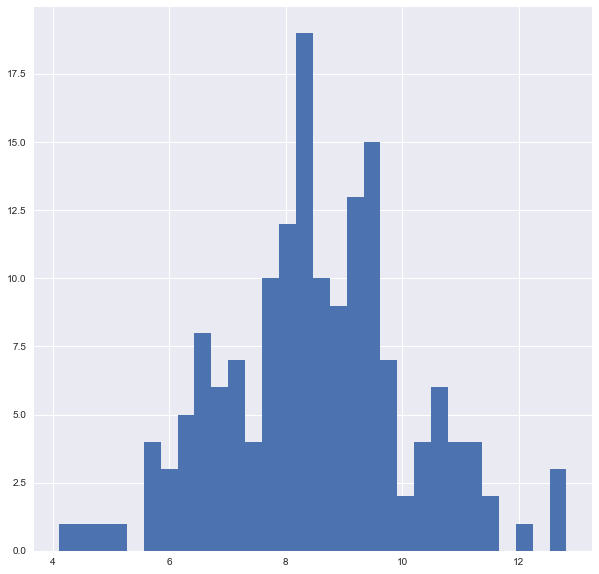

In [344]:
# xtick_list = range(0,500000,50000)
# ytick_list = range(0,y_train.shape[0],30)
# y_train.plot(kind='hist',subplots=True,fontsize=10,figsize=(10,10),xticks=xtick_list,yticks=ytick_list)
y_train.hist(bins=30,figsize=(10,10))
# pyplot.xlabel("Store Sales")
# pyplot.show()

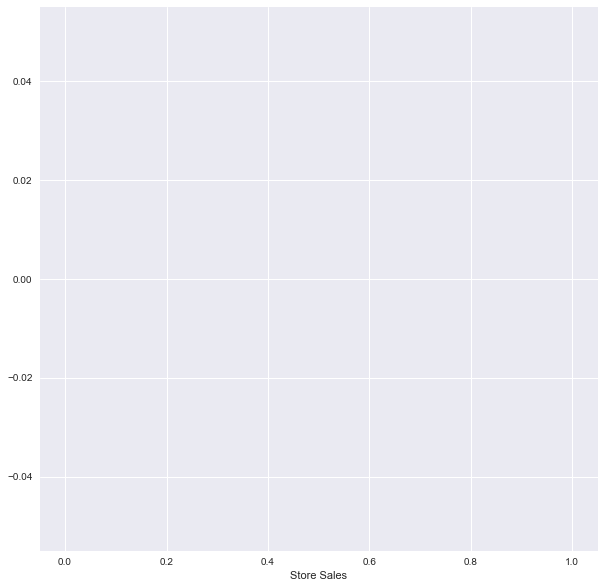

In [345]:
y_train[y_train.values < 0].hist(bins=30,figsize=(10,10),)
pyplot.xlabel("Store Sales")
pyplot.show()

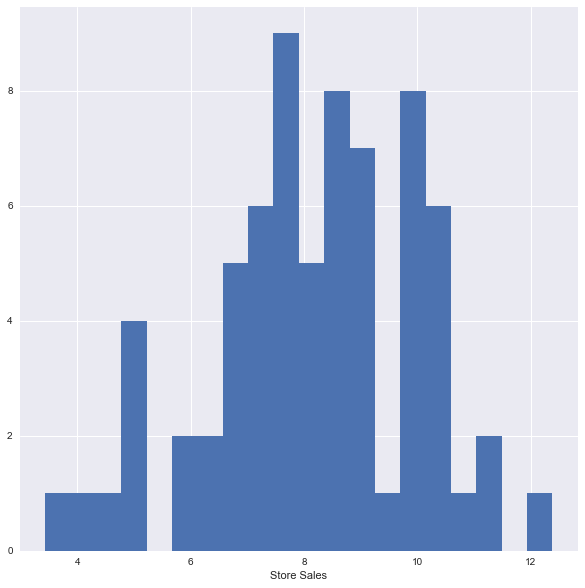

In [346]:
# xtick_list = range(0,500000,50000)
# ytick_list = range(0,y_test.shape[0],10)
#y_test.plot(kind='hist',subplots=True,fontsize=10,figsize=(10,10),grid=True,xticks=xtick_list,yticks=ytick_list)
y_test.hist(bins=20,figsize=(10,10))
pyplot.xlabel("Store Sales")
pyplot.show()

In [347]:
#Find the most balanced point of the data set :

# for i in np.arange(3000,10000,1000):
#     y_train_sp = y_train.apply(lambda x : 1 if x >=i else 0 )
#     y_test_sp = y_test.apply(lambda x : 1 if x >=i else 0)
#     print ("Split Point ", i)
#     print ("% of 0-class in Test ",y_test_sp.value_counts()[0]/ (y_test_sp.value_counts()[1]+y_test_sp.value_counts()[0])*100)
#     print ("% of 0-class in Train ",y_train_sp.value_counts()[0]/ (y_train_sp.value_counts()[1]+y_train_sp.value_counts()[0])*100)
#     print("\n")


In [348]:
# #Based on the above histogram comparison threshold 50,000 is a good enough to make binary classification target
# y_train = y_train.apply(lambda x : 1 if x >=5000 else 0 )
# y_test = y_test.apply(lambda x : 1 if x >=5000 else 0)

# y_test.value_counts()
# #Binary Targets created.

In [349]:
#y_test.value_counts()[0] / (y_test.value_counts()[1]+y_test.value_counts()[0])*100

In [350]:
#y_train.value_counts()

In [351]:
#y_train.value_counts()[0] / (y_train.value_counts()[1]+y_train.value_counts()[0])*100

In [352]:
set_option('precision', 1) 
#print(dataset.describe())type(X_train)

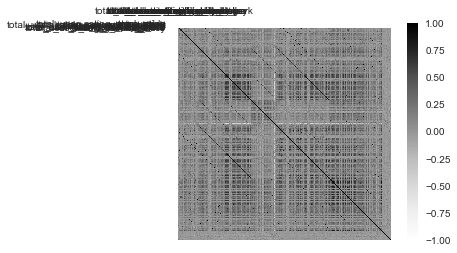

In [353]:
# # correlation matrix
names = sales_surrounding_pdf_ohe.columns
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(sales_surrounding_pdf_ohe.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [354]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [355]:
#Find Feature Importance via various methods
#1)Logistic Regression
#1.1) Logistic Regression with L1 Penalty (Lasso)
#2)Decision Tree

import warnings
warnings.filterwarnings('ignore')

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'mean_squared_error'

models = []
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: -46.389067 (51.382079)
LASSO: -3.392598 (1.779033)
EN: -3.492747 (2.090098)
KNN: -2.921763 (0.798317)
CART: -4.460788 (1.036577)
SVR: -2.539592 (0.875654)


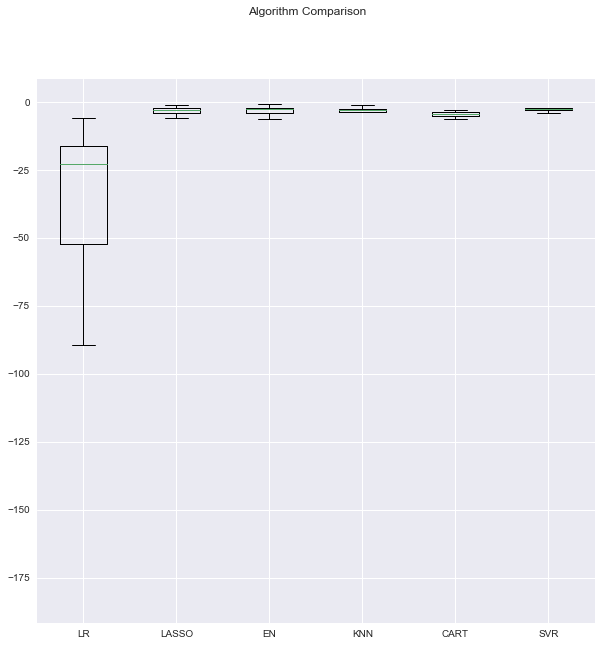

In [356]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [357]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import r2_score

reg = linear_model.Lasso(alpha = 0.1)

reg.get_params()
param_grid = { 
    #'alpha': [0.001,0.0015,0.002,0.003,0.004,0.005,0.006,0.007,0.01,]
    'alpha': np.arange(0.01,1.0,0.11)
}

CV_rfc = GridSearchCV(estimator=reg,param_grid=param_grid, cv= 5,scoring='mean_squared_error')
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

{'alpha': 0.89000000000000001}


In [358]:
print("Shape before Linear Reg" ,X_train.shape)

from sklearn.metrics import r2_score
reg = linear_model.Lasso(alpha = 0.89)
reg.fit(X_train, y_train)

print("Shape after Linear Reg",X_train.shape)
predictions = reg.predict(X_test)

y_test=np.exp(y_test)
predictions=np.exp(predictions)

print(mean_squared_error(y_test,predictions))

# print (len(reg.coef_))
#print (y_test,predictions)

Shape before Linear Reg (162, 708)
Shape after Linear Reg (162, 708)
1404092422.46


In [362]:
def pretty_print_linear(coefs, names = None, sort = True):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [363]:
print ("Linear model:", pretty_print_linear(reg.coef_))
print ("Features sorted by their score:")
#print (sorted(zip(map(lambda x: round(x, 4), reg.score), names), reverse=True))

Linear model: -0.04 * X547 + 0.026 * X420 + -0.015 * X416 + 0.014 * X494 + 0.012 * X353 + 0.011 * X418 + 0.008 * X414 + 0.007 * X13 + -0.005 * X347 + 0.005 * X577 + -0.004 * X381 + 0.004 * X553 + -0.004 * X50 + -0.003 * X377 + 0.002 * X395 + 0.002 * X27 + 0.002 * X368 + -0.002 * X371 + -0.002 * X343 + -0.002 * X417 + -0.001 * X348 + -0.001 * X394 + -0.001 * X373 + -0.0 * X409 + -0.0 * X397 + -0.0 * X388 + 0.0 * X677 + -0.0 * X361 + 0.0 * X389 + 0.0 * X0 + -0.0 * X1 + 0.0 * X2 + 0.0 * X3 + 0.0 * X4 + -0.0 * X5 + 0.0 * X6 + 0.0 * X7 + 0.0 * X8 + -0.0 * X9 + -0.0 * X10 + 0.0 * X11 + -0.0 * X12 + 0.0 * X14 + 0.0 * X15 + -0.0 * X16 + 0.0 * X17 + 0.0 * X18 + -0.0 * X19 + 0.0 * X20 + 0.0 * X21 + 0.0 * X22 + -0.0 * X23 + -0.0 * X24 + -0.0 * X25 + 0.0 * X26 + 0.0 * X28 + 0.0 * X29 + 0.0 * X30 + -0.0 * X31 + -0.0 * X32 + -0.0 * X33 + 0.0 * X34 + 0.0 * X35 + 0.0 * X36 + -0.0 * X37 + 0.0 * X38 + 0.0 * X39 + -0.0 * X40 + 0.0 * X41 + 0.0 * X42 + -0.0 * X43 + 0.0 * X44 + 0.0 * X45 + 0.0 * X46 + -0.0 

In [361]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
    Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))) 
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -5.311645 (2.085937)
ScaledLASSO: -2.613132 (0.911535)
ScaledEN: -2.575451 (0.859072)
ScaledKNN: -2.400389 (0.513118)
ScaledCART: -4.175799 (1.069881)
ScaledSVR: -2.292991 (0.862483)
